In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

In [2]:
data = pd.read_csv('operations.csv')
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_operation  309 non-null    object 
 1   libelle         309 non-null    object 
 2   montant         307 non-null    float64
 3   solde_avt_ope   309 non-null    float64
 4   categ           308 non-null    object 
dtypes: float64(2), object(3)
memory usage: 12.2+ KB


In [4]:
data.loc[(data['montant'].duplicated(keep=False)) & (data['solde_avt_ope'].duplicated(keep=False))]

,date_operation,libelle,montant,solde_avt_ope,categ
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


In [5]:
data = data.drop_duplicates(ignore_index=True)

In [6]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [7]:
data.isnull().sum()

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64

In [8]:
data.loc[(data['montant'].isnull( )) | (data['categ'].isnull())]

,date_operation,libelle,montant,solde_avt_ope,categ
106,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
155,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
268,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


In [9]:
data.iloc[104:108]

,date_operation,libelle,montant,solde_avt_ope,categ
104,2023-06-12,CARTE XX XX TOUPTIPRI XX,-5.88,4675.39,COURSES
105,2023-06-12,CARTE XX XX XX XX XX XX,-2.32,4669.51,AUTRE
106,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
107,2023-06-12,CARTE XX XX CHEZ LUC XX,-9.20,4640.61,RESTAURANT


In [10]:
data.iloc[106,2] = data.iloc[107,3] - data.iloc[106,3]

In [11]:
data.iloc[267:270]

,date_operation,libelle,montant,solde_avt_ope,categ
267,2023-09-11,CARTE XX XX XX XX,-9.60,3411.53,AUTRE
268,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE
269,2023-09-11,CARTE XX XX XX XX XX XX,-1.44,3389.93,AUTRE


In [12]:
data.iloc[268,2] = data.iloc[269,3] - data.iloc[268,3]

Autre Solution

In [13]:
# on stocke le df des valeurs manquantes dans un nouveau df
data_na = data.loc[data['montant'].isnull(),:]

# pour chaque ligne de mon df, on récupère les index (qui ne changent pas au travers du .loc)
for index in data_na.index:
    # calcul du montant à partir des soldes précédents et actuels
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']

In [14]:
data.iloc[155, 4] = 'FACTURE TELEPHONE'

In [15]:
data.loc[data['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX']

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
61,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
101,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
155,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,FACTURE TELEPHONE
203,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
259,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
307,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


In [16]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [17]:
data['date_operation'] = pd.to_datetime(data['date_operation'])

In [18]:
data.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

In [19]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [20]:
data.describe()

,date_operation,montant,solde_avt_ope
count,308,308.000000,308.000000
mean,2023-07-05 10:59:13.246753280,-45.782013,3395.301071
min,2023-03-31 00:00:00,-15000.000000,1416.810000
25%,2023-05-21 06:00:00,-20.447500,3010.737500
50%,2023-07-05 12:00:00,-9.600000,3452.465000
75%,2023-08-21 00:00:00,-2.715000,3787.232500
max,2023-10-06 00:00:00,1071.600000,4709.310000
std,NaN,872.818105,667.109412


In [21]:
data.loc[data['montant'] <= -1000]


,date_operation,libelle,montant,solde_avt_ope,categ
198,2023-08-03,CARTE XX XX XX XX,-15000.0,3797.35,AUTRE


In [22]:
data.iloc[197:200]

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


Autre méthode

In [23]:
i = data.loc[data['montant']==-15000,:].index[0] # récupération de l'index de la transaction à -15000

data.iloc[i-1:i+2,:] # on regarde la transaction précédente et la suivante

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [24]:
data.loc[data['montant']==-15000, 'montant'] = data.iloc[i+1, 3] - data.iloc[i,3]

In [25]:
data['quart_mois'] = [int((jour-1)*4/31)+1 for jour in data["date_operation"].dt.day]

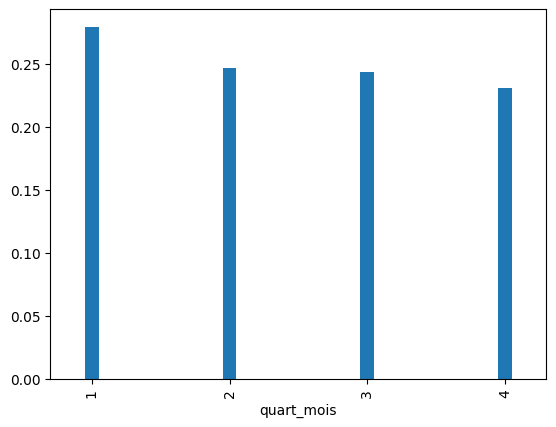

In [26]:
data["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)

plt.show()

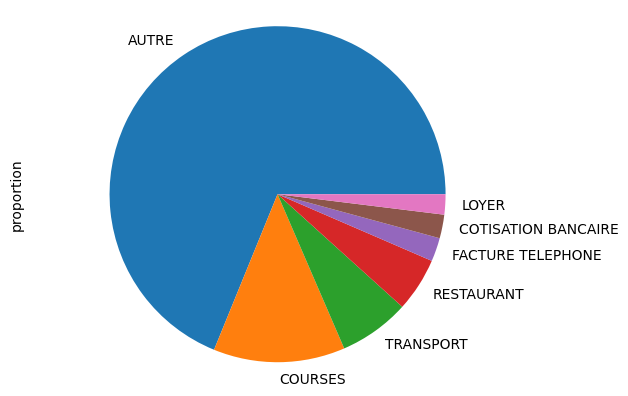

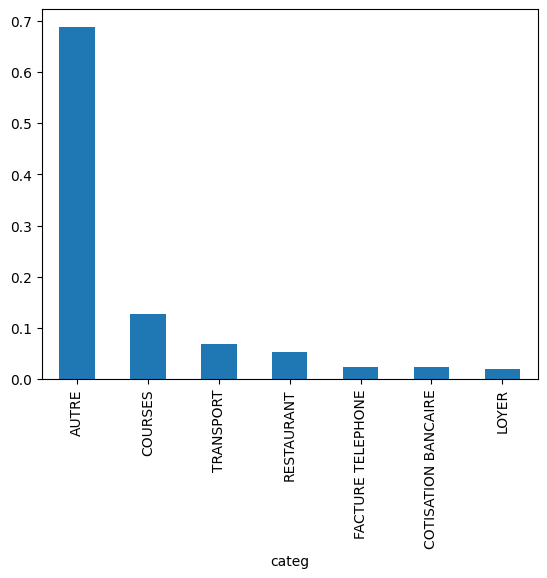

In [27]:
# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')
plt.show()

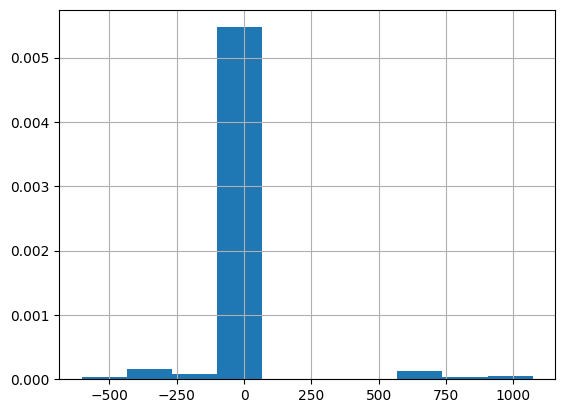

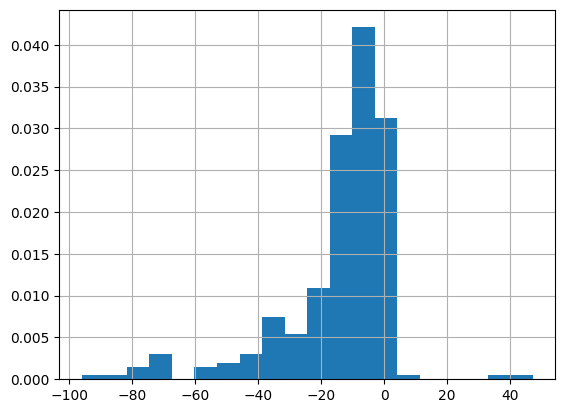

In [28]:
# Histogramme
data["montant"].hist(density=True)
plt.show()

# Histogramme plus beau
data[data.montant.abs() < 100]["montant"].hist(density=True,bins=20)
plt.show()

In [29]:
effectifs = data["quart_mois"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["quart_mois"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon

In [30]:
tab = tab.sort_values("quart_mois") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

In [31]:
tab

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


In [32]:
index = data['categ'].value_counts().index

AUTRE : la moyenne est 23.43, La médiane est -8.31, Le mode est 0   -1.6
Name: montant, dtype: float64


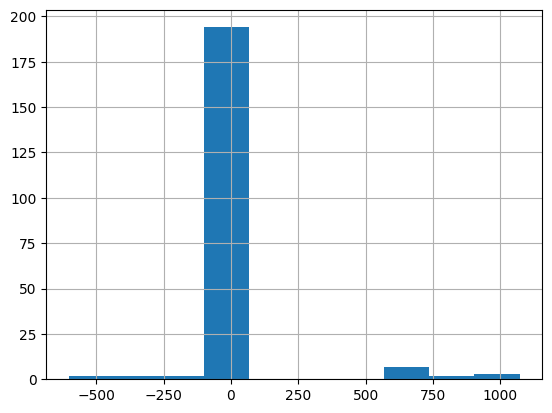

COURSES : la moyenne est -16.34, La médiane est -12.24, Le mode est 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64


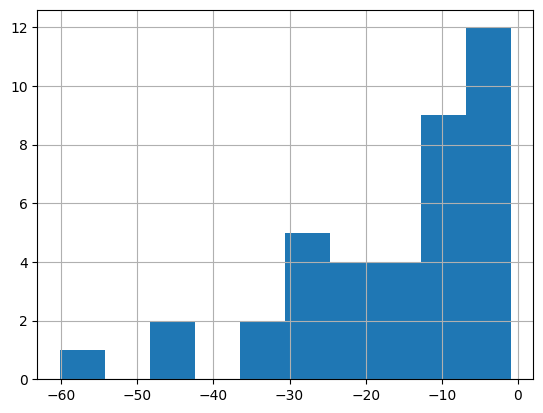

TRANSPORT : la moyenne est -53.0, La médiane est -53.1, Le mode est 0   -73.0
Name: montant, dtype: float64


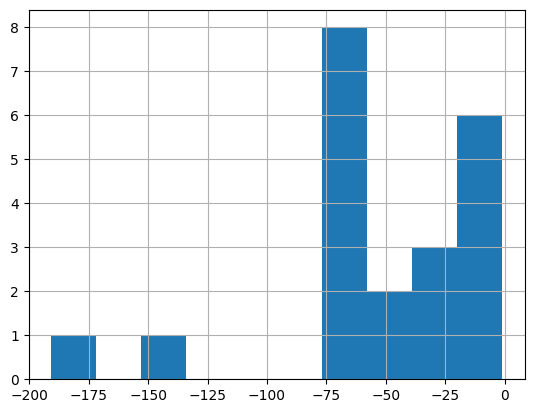

RESTAURANT : la moyenne est -10.33, La médiane est -10.1, Le mode est 0   -9.2
Name: montant, dtype: float64


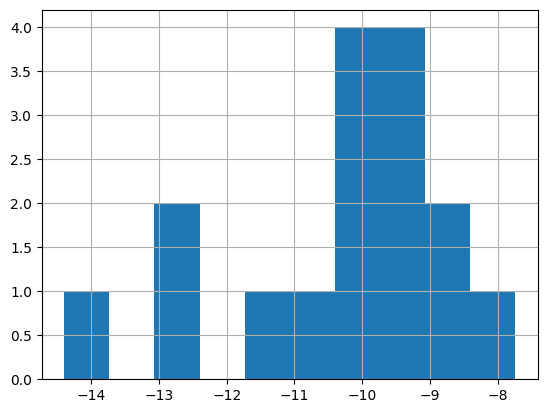

FACTURE TELEPHONE : la moyenne est -12.05, La médiane est -7.02, Le mode est 0   -7.02
1   -6.38
Name: montant, dtype: float64


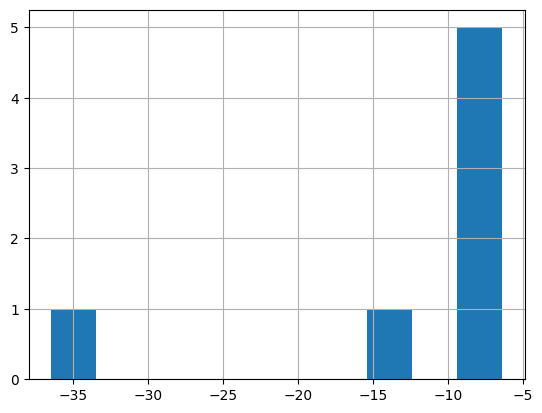

COTISATION BANCAIRE : la moyenne est -1.89, La médiane est -1.92, Le mode est 0   -1.92
Name: montant, dtype: float64


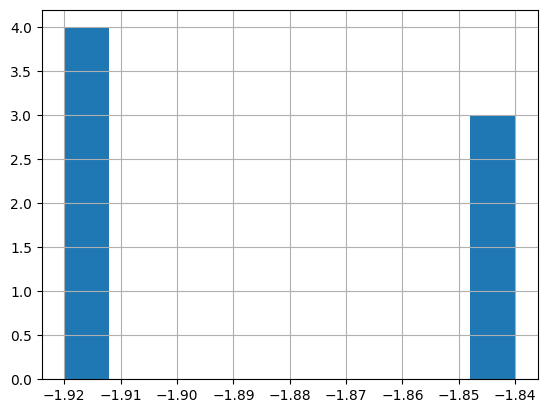

LOYER : la moyenne est -345.0, La médiane est -345.0, Le mode est 0   -345.0
Name: montant, dtype: float64


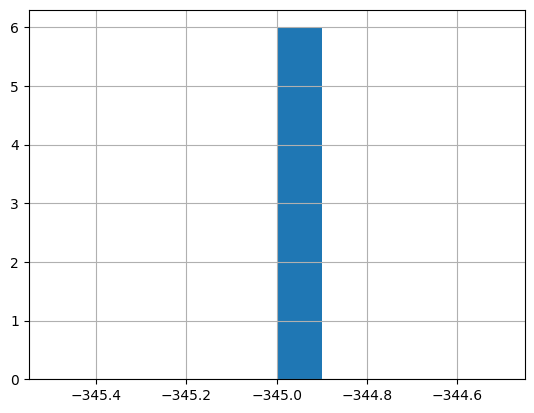

In [33]:
for i in index:
    mod = data.loc[data['categ'] == i, 'montant'].mode()
    med = data.loc[data['categ'] == i, 'montant'].median()
    moy = data.loc[data['categ'] == i, 'montant'].mean()
    print(f'{i} : la moyenne est {round(moy, 2)}, La médiane est {med}, Le mode est {mod}')
    data.loc[data['categ'] == i, 'montant'].hist()
    plt.show()

Autre solution

--------------------
AUTRE
moy:
 23.433207547169808
med:
 -8.31
mod:
 0   -1.6
Name: montant, dtype: float64
var:
 40401.82999254183
ect:
 201.00206464746034


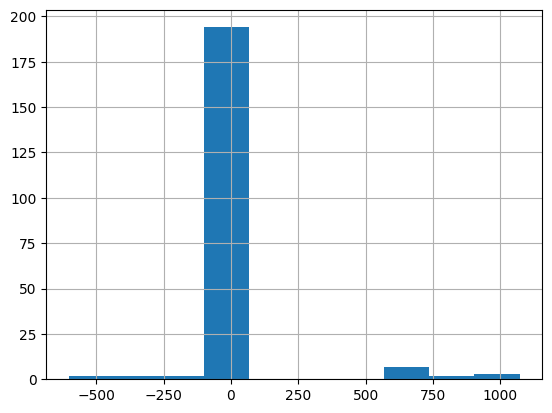

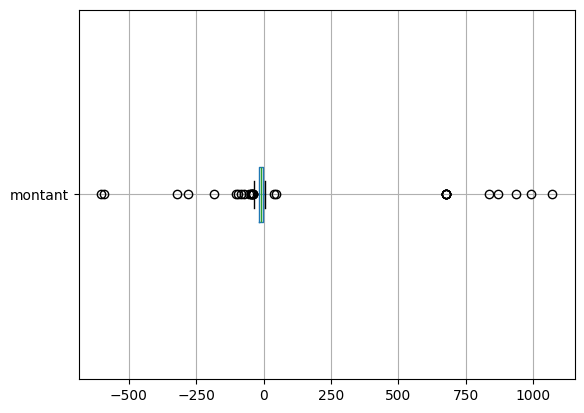

--------------------
TRANSPORT
moy:
 -52.99714285714286
med:
 -53.1
mod:
 0   -73.0
Name: montant, dtype: float64
var:
 2205.0168680272113
ect:
 46.95760713694014


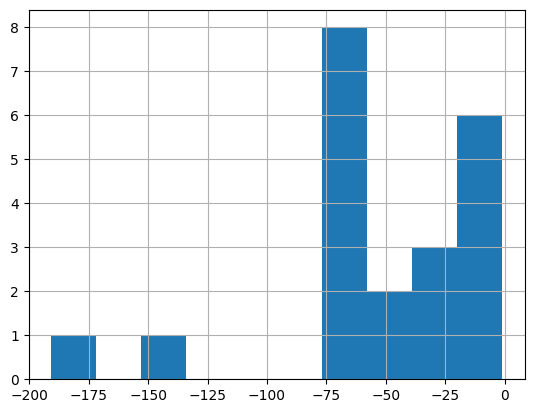

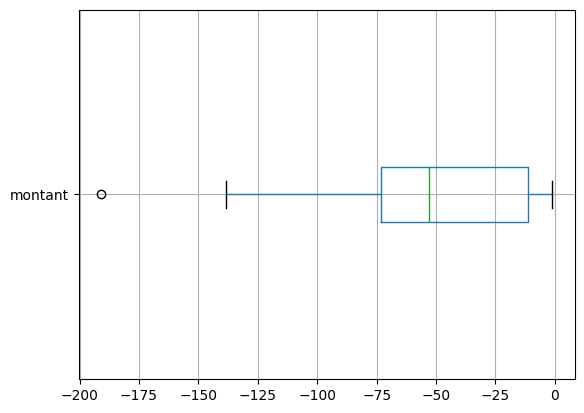

--------------------
FACTURE TELEPHONE
moy:
 -12.045714285714283
med:
 -7.02
mod:
 0   -7.02
1   -6.38
Name: montant, dtype: float64
var:
 105.01905306122445
ect:
 10.247880417980317


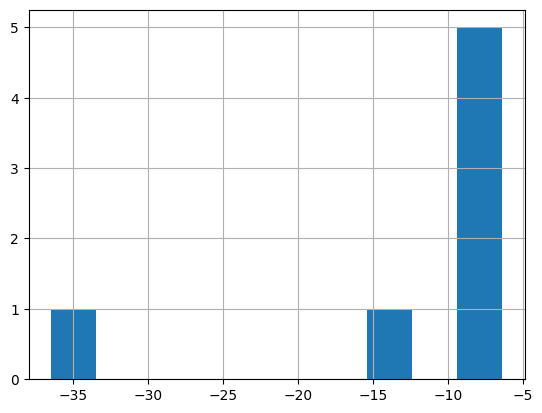

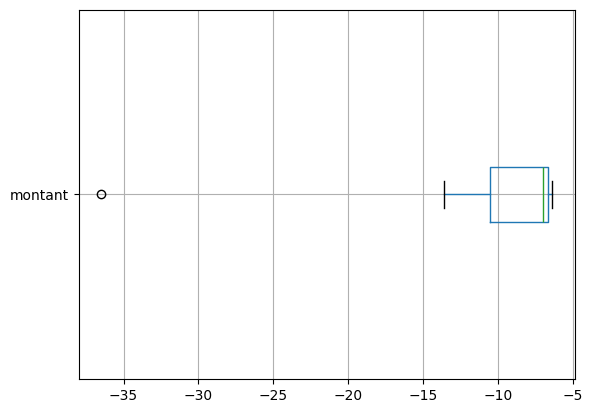

--------------------
COURSES
moy:
 -16.34128205128205
med:
 -12.24
mod:
 0    -60.16
1    -42.45
2    -42.42
3    -33.55
4    -32.67
5    -29.18
6    -28.11
7    -27.68
8    -26.58
9    -26.19
10   -23.43
11   -22.59
12   -21.73
13   -20.59
14   -18.45
15   -17.16
16   -13.59
17   -12.96
18   -12.49
19   -12.24
20   -10.91
21   -10.36
22    -9.88
23    -9.60
24    -9.31
25    -9.11
26    -6.89
27    -6.80
28    -6.60
29    -5.88
30    -4.63
31    -4.41
32    -4.39
33    -3.48
34    -2.93
35    -2.56
36    -2.51
37    -1.90
38    -0.94
Name: montant, dtype: float64
var:
 177.02535476660088
ect:
 13.3050875520081


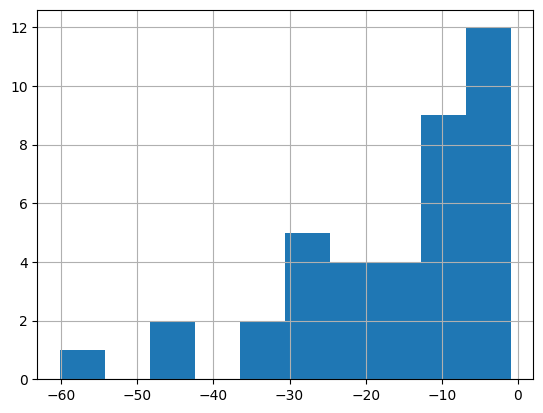

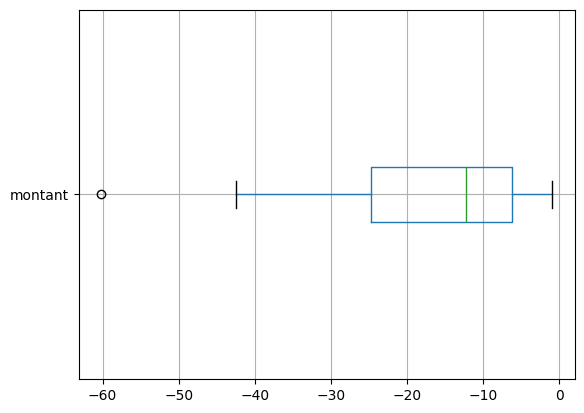

--------------------
COTISATION BANCAIRE
moy:
 -1.8857142857142857
med:
 -1.92
mod:
 0   -1.92
Name: montant, dtype: float64
var:
 0.0015673469387755044
ect:
 0.03958973274443141


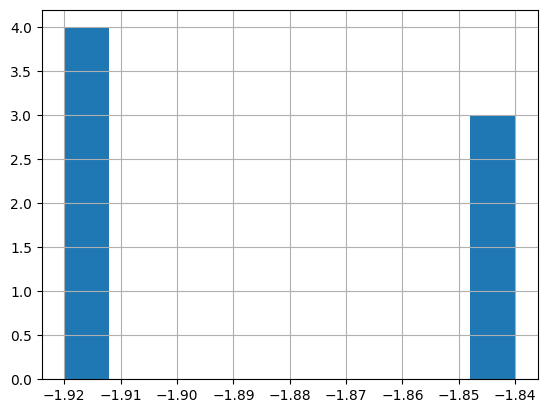

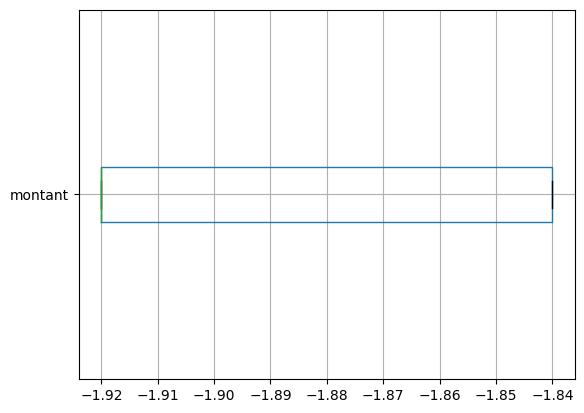

--------------------
RESTAURANT
moy:
 -10.3325
med:
 -10.1
mod:
 0   -9.2
Name: montant, dtype: float64
var:
 2.8531937500000004
ect:
 1.689139943876765


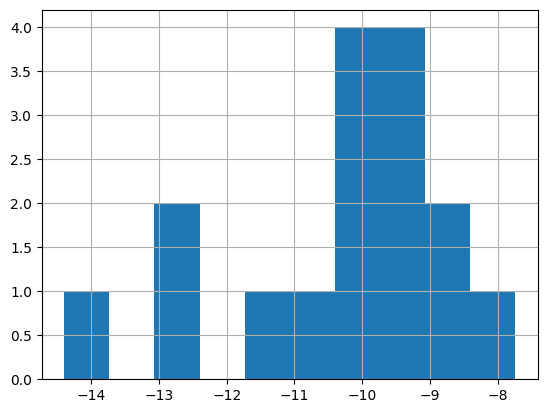

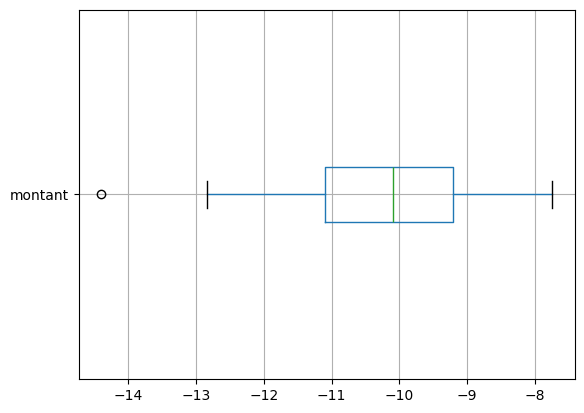

--------------------
LOYER
moy:
 -345.0
med:
 -345.0
mod:
 0   -345.0
Name: montant, dtype: float64
var:
 0.0
ect:
 0.0


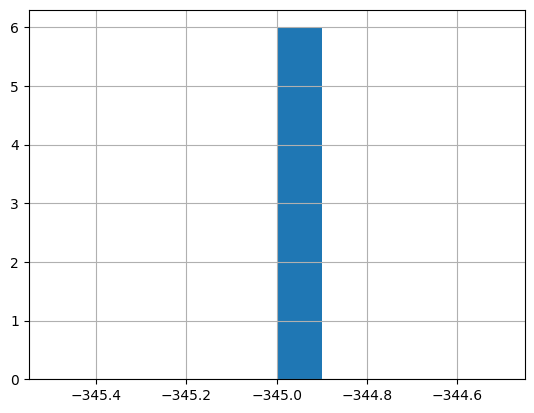

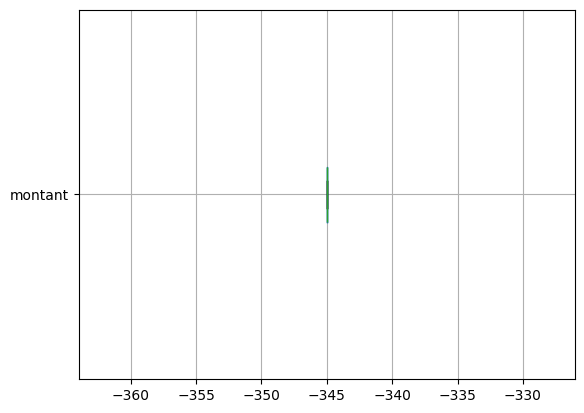

In [43]:
for cat in data["categ"].unique():
    subset = data[data.categ == cat]
    print("-"*20)
    print(cat)
    print("moy:\n",subset['montant'].mean())
    print("med:\n",subset['montant'].median())
    print("mod:\n",subset['montant'].mode())
    print("var:\n",subset['montant'].var(ddof=0))
    print("ect:\n",subset['montant'].std(ddof=0))
    subset["montant"].hist()
    plt.show()
    subset.boxplot(column="montant", vert=False)
    plt.show()